# Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


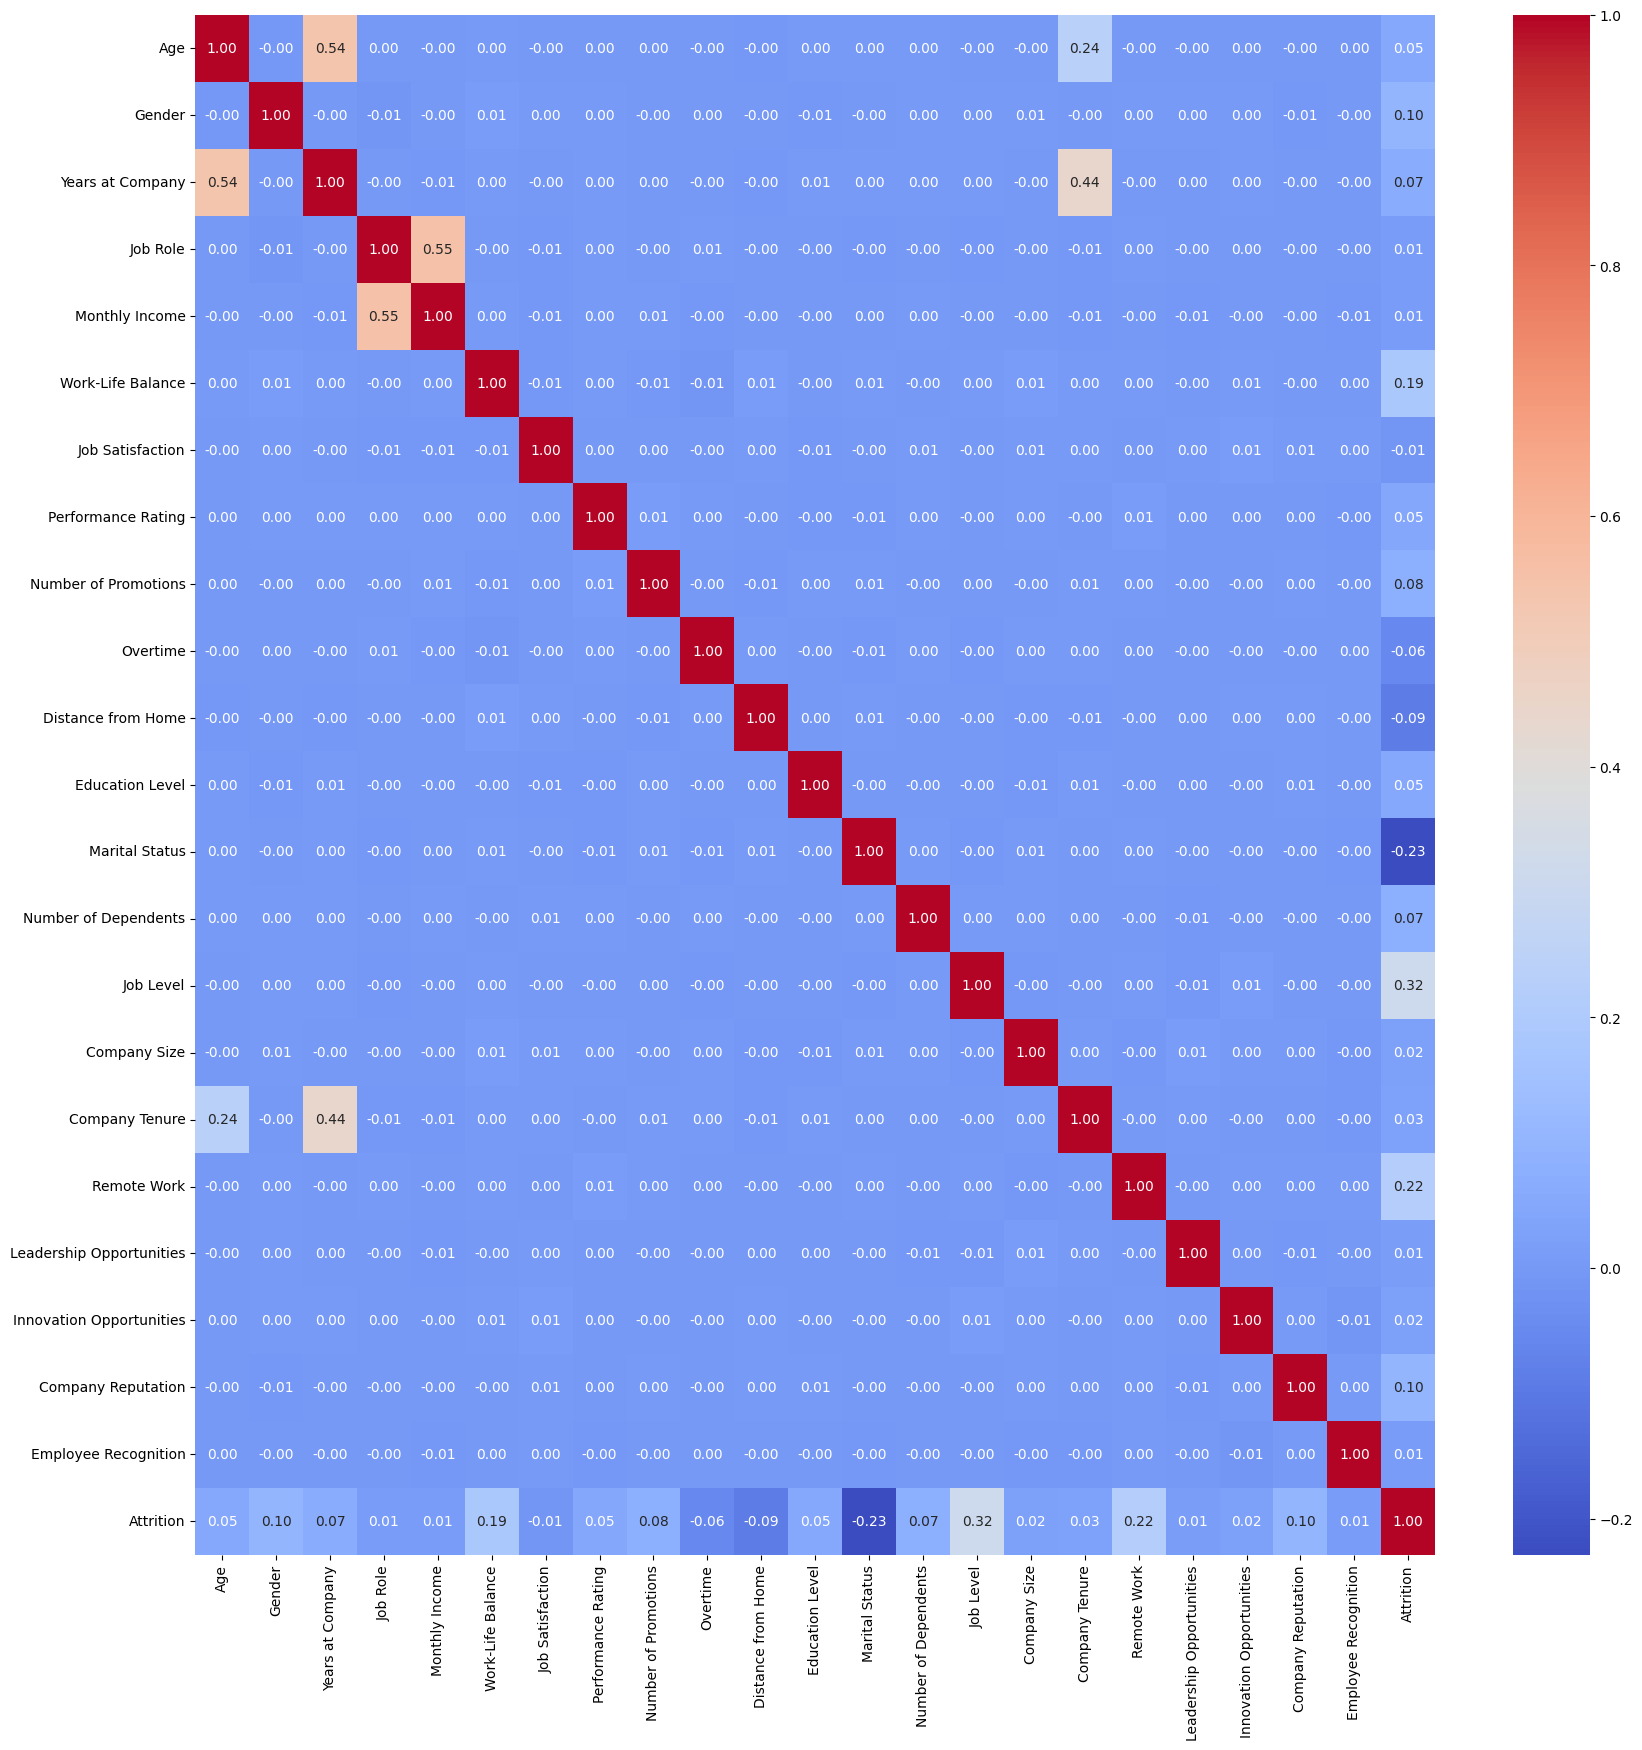

In [40]:
# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [41]:
# Select columns with correlation > 0.1
corr = df.corr()
corr = corr[corr['Attrition'] >= 0.]
corr = corr['Attrition']
corr

Age                     0.050869
Gender                  0.100653
Years at Company        0.065433
Work-Life Balance       0.186255
Number of Promotions    0.081051
Number of Dependents    0.074704
Job Level               0.315275
Remote Work             0.221144
Company Reputation      0.101053
Attrition               1.000000
Name: Attrition, dtype: float64

In [42]:
selected_df = corr

# Train Test Split

In [43]:
# train test split
X = df[selected_df.index].drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59546, 9)
(14887, 9)
(59546,)
(14887,)


# Model

**Logistik Regression**

In [44]:
# Logistrik Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_y_pred = logreg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, lg_y_pred, digits=4))

Classification Report: 
               precision    recall  f1-score   support

           0     0.6793    0.6803    0.6798      7051
           1     0.7119    0.7109    0.7114      7836

    accuracy                         0.6964     14887
   macro avg     0.6956    0.6956    0.6956     14887
weighted avg     0.6965    0.6964    0.6965     14887



**KKN**

In [45]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, knn_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6044    0.6442    0.6236      7051
           1     0.6597    0.6206    0.6395      7836

    accuracy                         0.6318     14887
   macro avg     0.6320    0.6324    0.6316     14887
weighted avg     0.6335    0.6318    0.6320     14887



**Random Forest**

In [46]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, rf_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6544    0.6632    0.6588      7051
           1     0.6932    0.6849    0.6890      7836

    accuracy                         0.6746     14887
   macro avg     0.6738    0.6740    0.6739     14887
weighted avg     0.6749    0.6746    0.6747     14887



**Decesion Tree**

In [47]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, dt_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.5949    0.6141    0.6043      7051
           1     0.6424    0.6237    0.6329      7836

    accuracy                         0.6191     14887
   macro avg     0.6186    0.6189    0.6186     14887
weighted avg     0.6199    0.6191    0.6193     14887



**SVC**

In [48]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, svc_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6780    0.6911    0.6845      7051
           1     0.7171    0.7047    0.7109      7836

    accuracy                         0.6983     14887
   macro avg     0.6976    0.6979    0.6977     14887
weighted avg     0.6986    0.6983    0.6984     14887



**Naive Bayes**

In [49]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, nb_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6502    0.7497    0.6964      7051
           1     0.7388    0.6371    0.6842      7836

    accuracy                         0.6904     14887
   macro avg     0.6945    0.6934    0.6903     14887
weighted avg     0.6968    0.6904    0.6900     14887



**XGBoost**

In [50]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, xgb_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6808    0.7060    0.6932      7051
           1     0.7263    0.7021    0.7140      7836

    accuracy                         0.7040     14887
   macro avg     0.7036    0.7041    0.7036     14887
weighted avg     0.7048    0.7040    0.7042     14887



**AdaBoost**

In [51]:
# ADaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, ada_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6914    0.7097    0.7004      7051
           1     0.7324    0.7150    0.7236      7836

    accuracy                         0.7125     14887
   macro avg     0.7119    0.7124    0.7120     14887
weighted avg     0.7130    0.7125    0.7126     14887



# Visualisasi

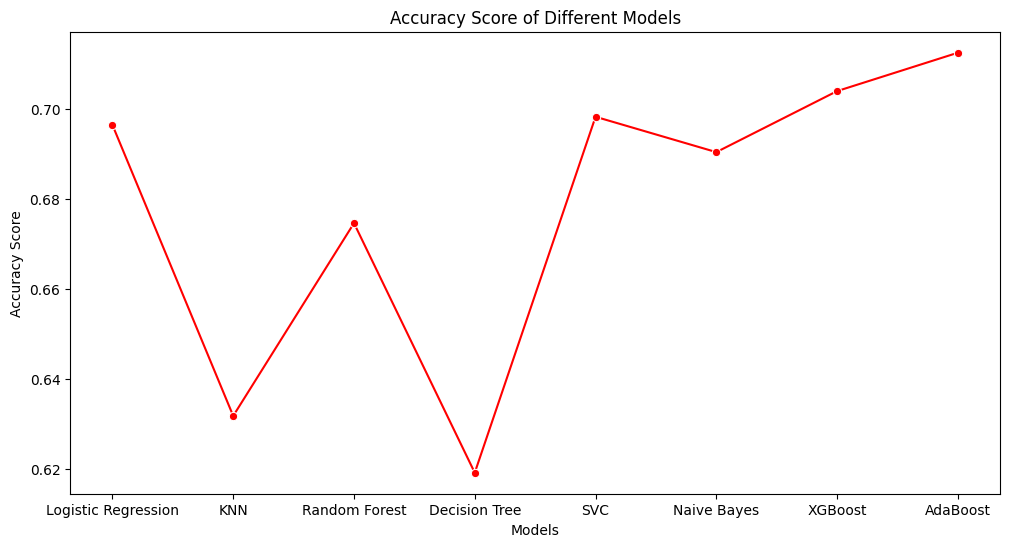

In [52]:
# Plotting the acuracy scores of all the models
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red')
plt.title('Accuracy Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

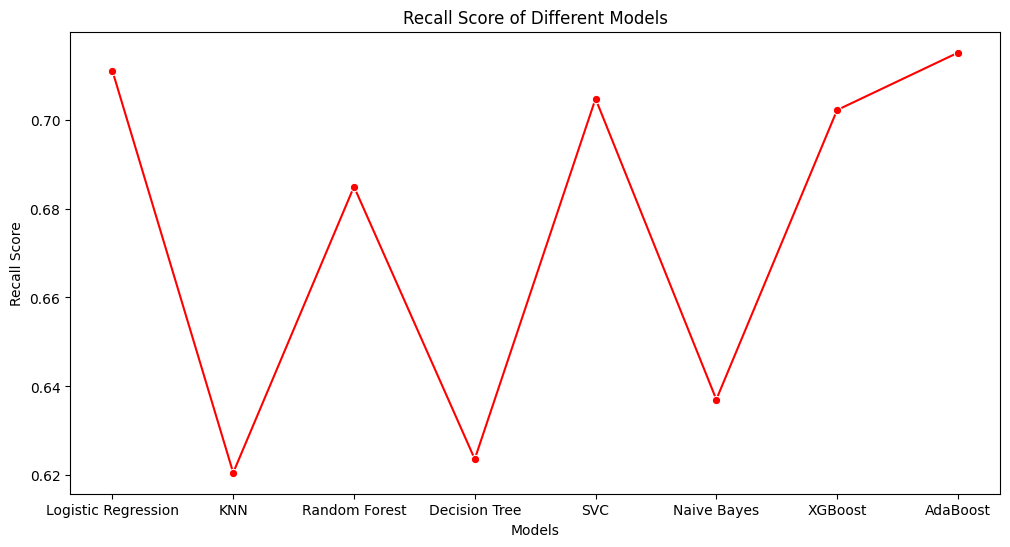

In [53]:
# Plotting the recall scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Recall Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

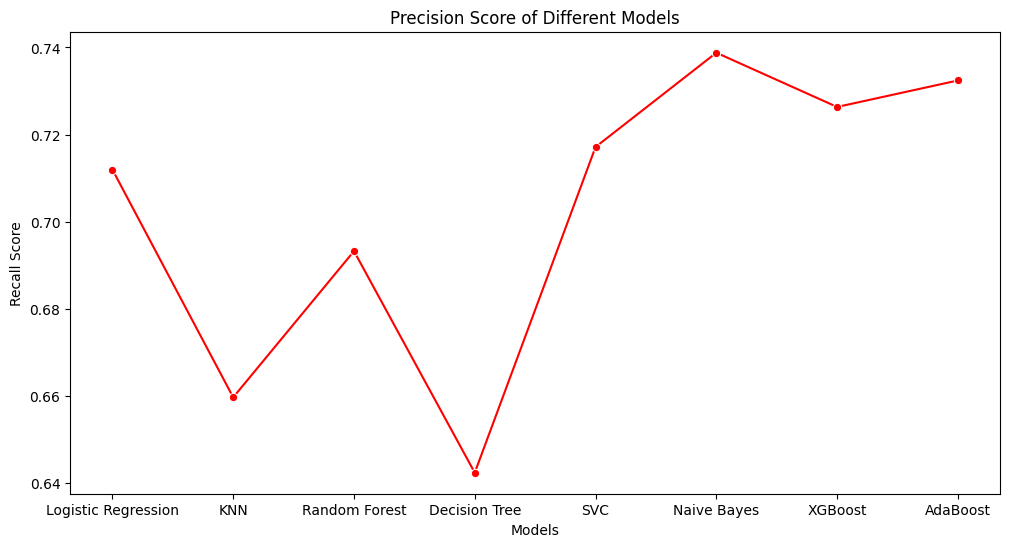

In [54]:
# Plotting the precision scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Precision Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

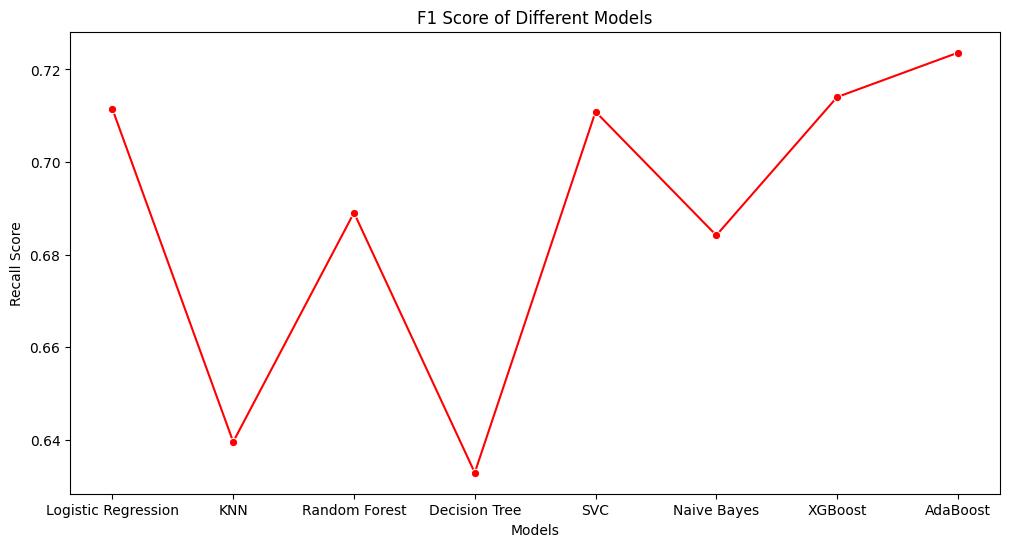

In [55]:
# Plotting the f1 scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('F1 Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

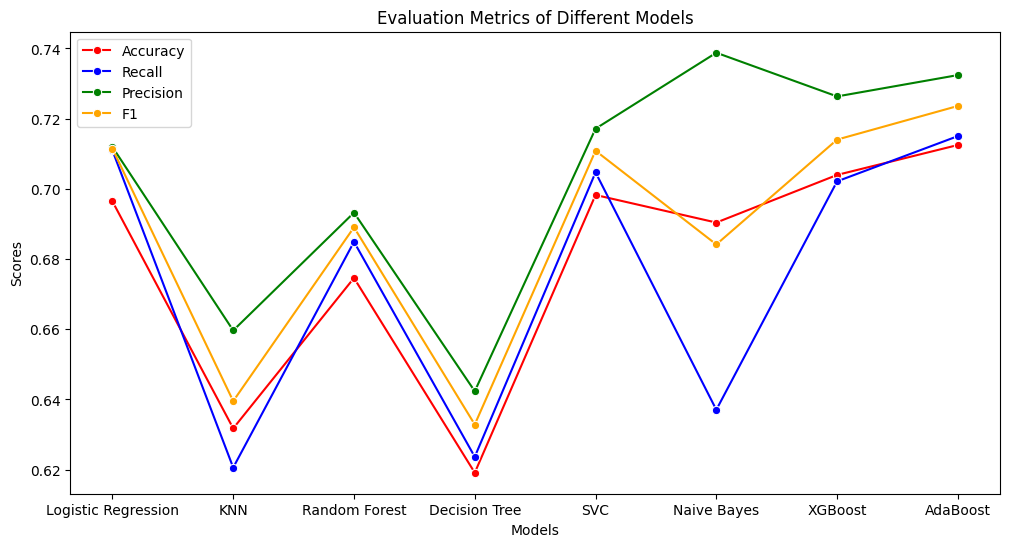

In [56]:
# plot all model all evaluation on one plot
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]
precision = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]
f1 = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red', label='Accuracy')
sns.lineplot(x=models, y=recall, marker='o', color='blue', label='Recall')
sns.lineplot(x=models, y=precision, marker='o', color='green', label='Precision')
sns.lineplot(x=models, y=f1, marker='o', color='orange', label='F1')
plt.title('Evaluation Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

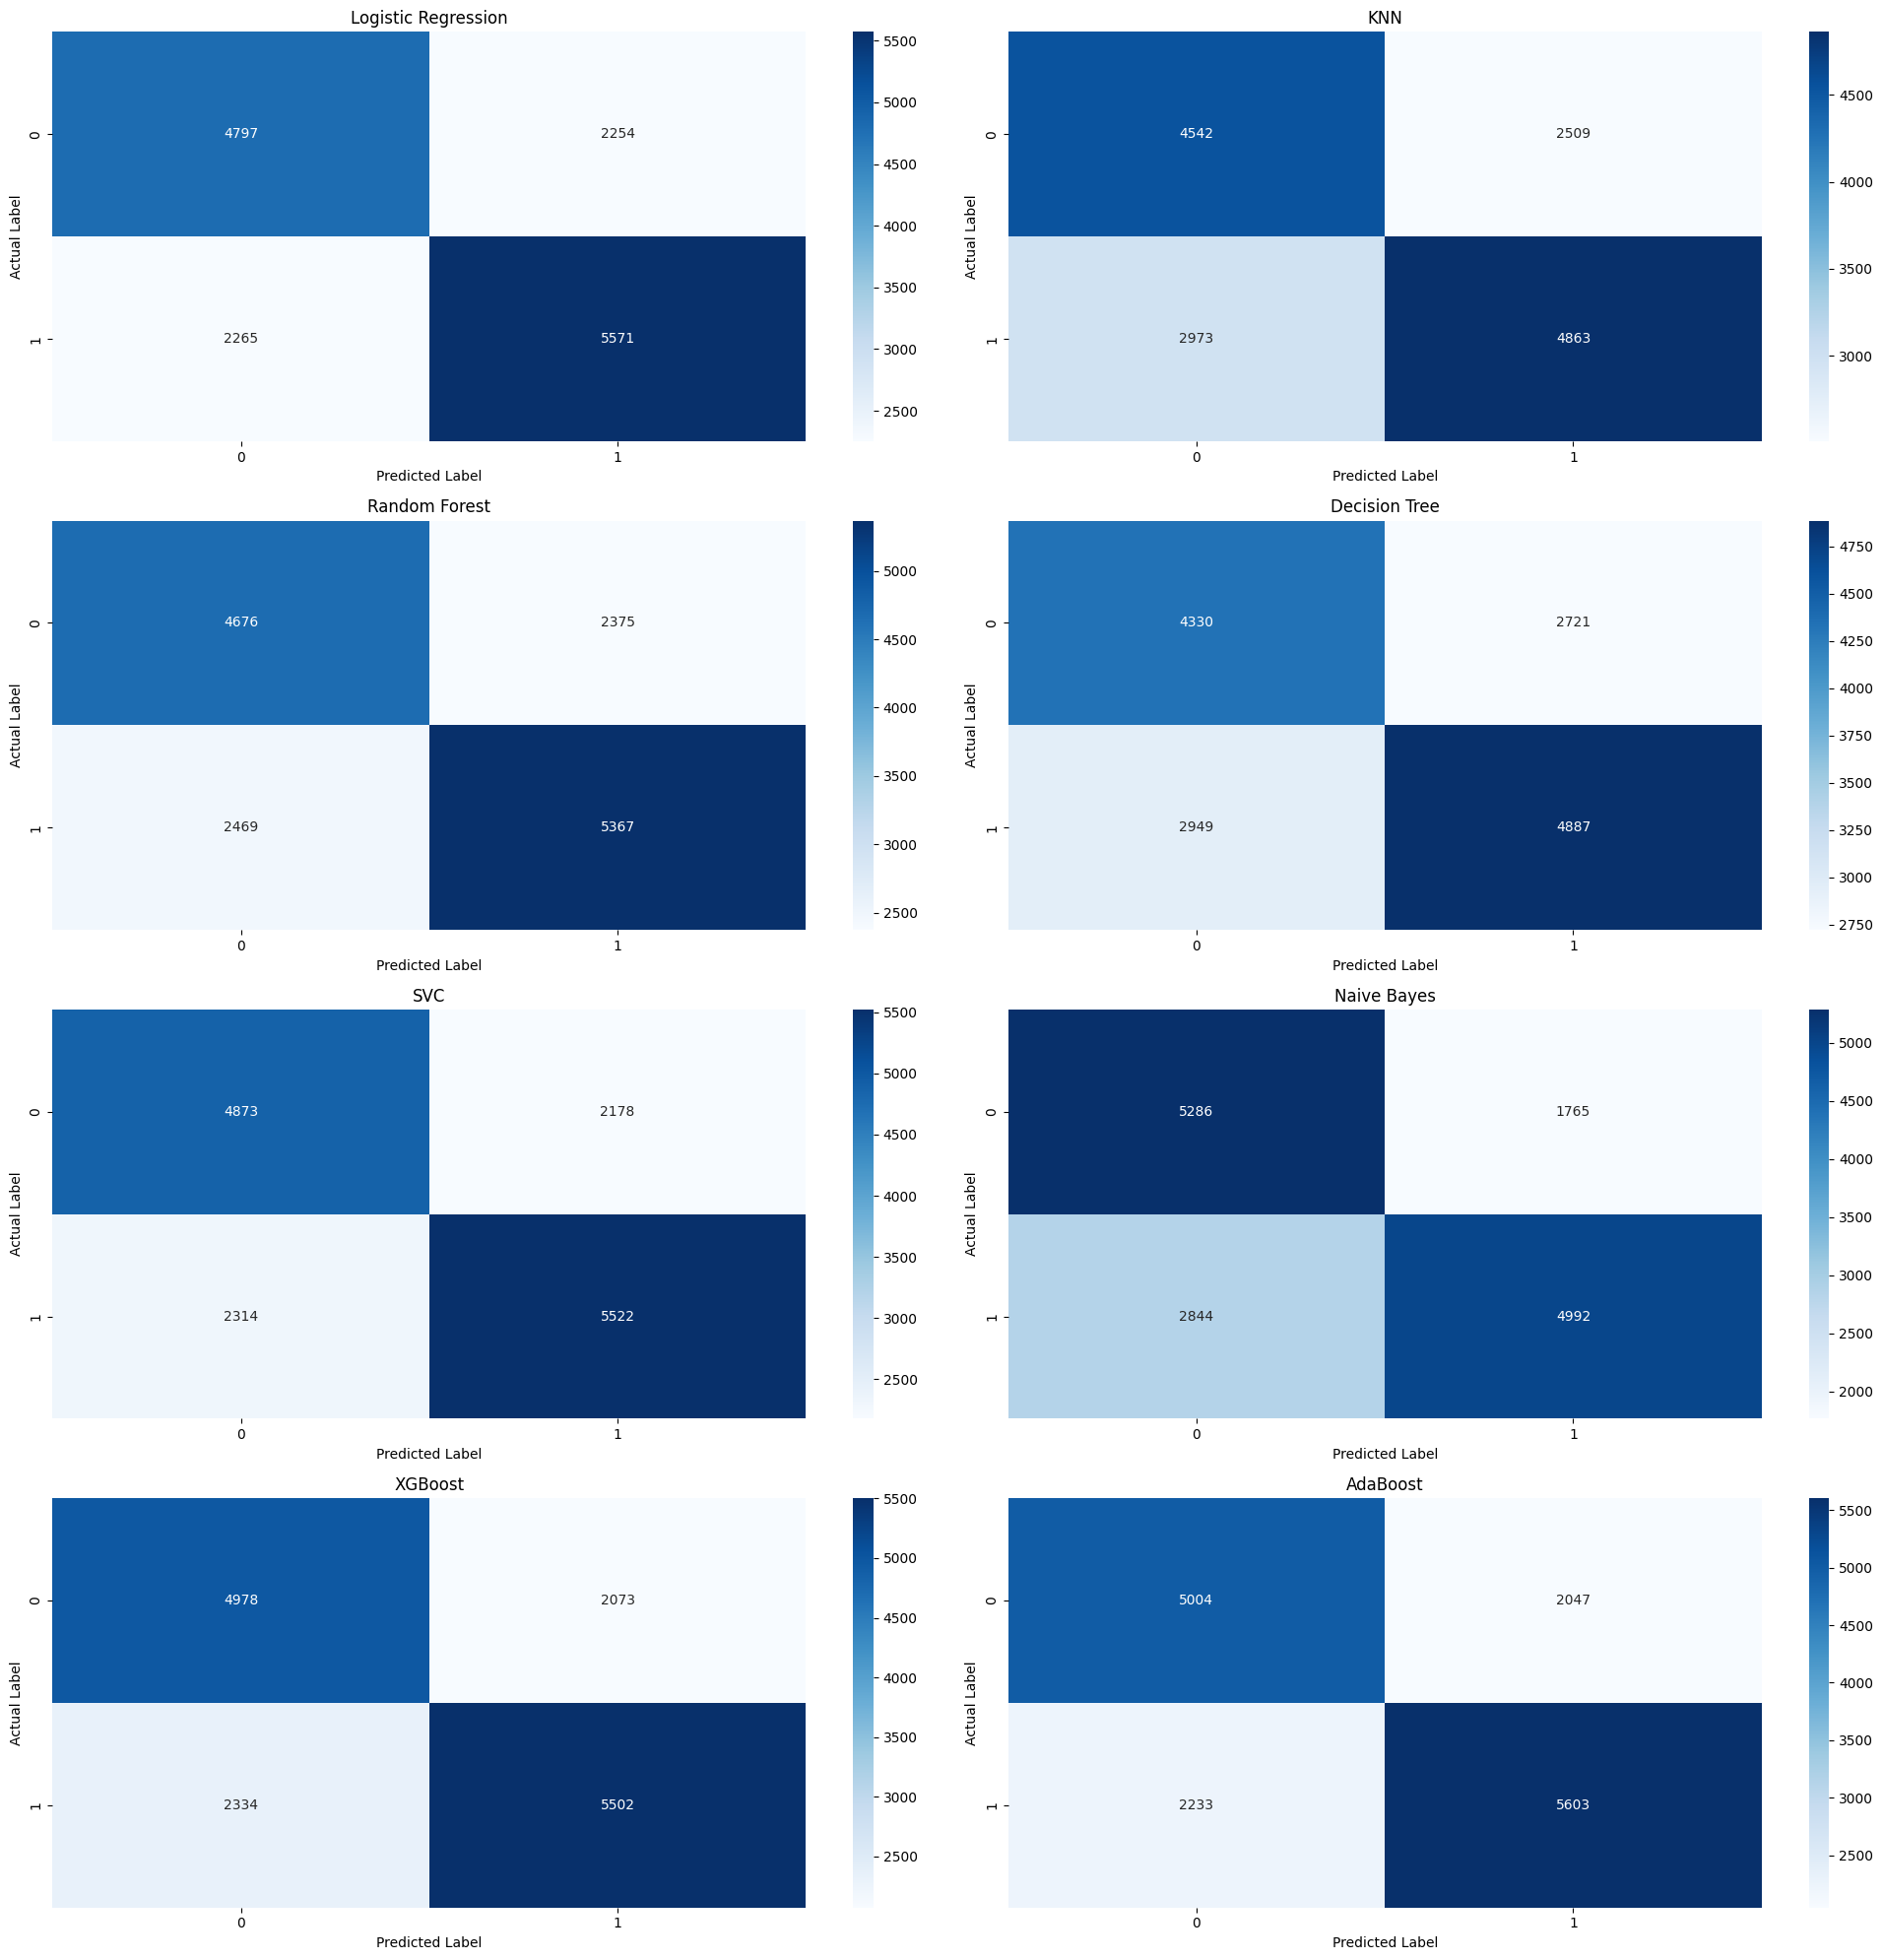

In [57]:
# Plot all confusion matrix on one plot
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression')

plt.subplot(4, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN')

plt.subplot(4, 2, 3)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest')

plt.subplot(4, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')

plt.subplot(4, 2, 5)
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVC')

plt.subplot(4, 2, 6)
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes')

plt.subplot(4, 2, 7)
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('Actual Label')
plt.title('XGBoost')

plt.subplot(4, 2, 8)
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('AdaBoost')


plt.tight_layout()
plt.show()
